In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial

# Data load


In [18]:
df1 = pd.read_csv('data1-1.csv', sep = '\t')
df2 = pd.read_csv('data1-2.csv', sep = '\t')
df3 = pd.read_csv('data1-3.csv', sep = '\t')

# Data Preprocessing

In [19]:
# check imcomplete data
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())

df1_clean = df1.dropna()
df2_clean = df2.dropna()
df3_clean = df3.dropna()


x    0
y    0
dtype: int64
x    0
y    0
dtype: int64
x    2
y    2
dtype: int64


In [20]:
# noise
def remove_outliers(df, column_name):
    mean = df[column_name].mean()
    std = df[column_name].std()
    threshold = 2  
    filtered_df = df[(np.abs(df[column_name] - mean) <= threshold * std)]
    return filtered_df

# delete noisy
df1_clean = remove_outliers(df1_clean, 'y')
df2_clean = remove_outliers(df2_clean, 'y')
df3_clean = remove_outliers(df3_clean, 'y')

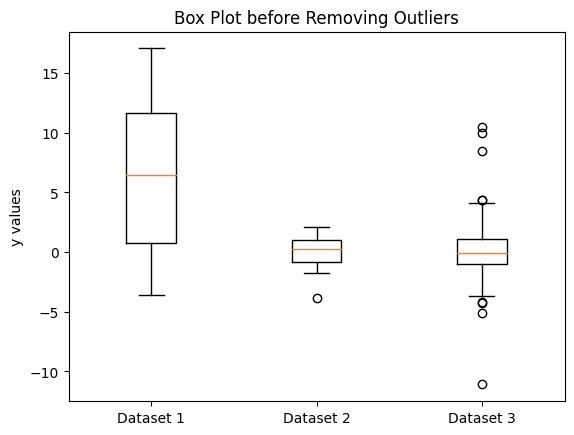

In [21]:
# show noise
plt.boxplot([df1_clean['y'], df2_clean['y'], df3_clean['y']], labels=['Dataset 1', 'Dataset 2', 'Dataset 3'])
plt.title('Box Plot before Removing Outliers')
plt.ylabel('y values')
plt.show()


# parameter model

In [31]:
# linear MODEL
def linear_model(x, a, b):
    return a * x + b

In [49]:
params1, _ = curve_fit(linear_model, df1_clean['x'], df1_clean['y'])
params2, _ = curve_fit(linear_model, df2_clean['x'], df2_clean['y'])
params3, _ = curve_fit(linear_model, df3_clean['x'], df3_clean['y'])


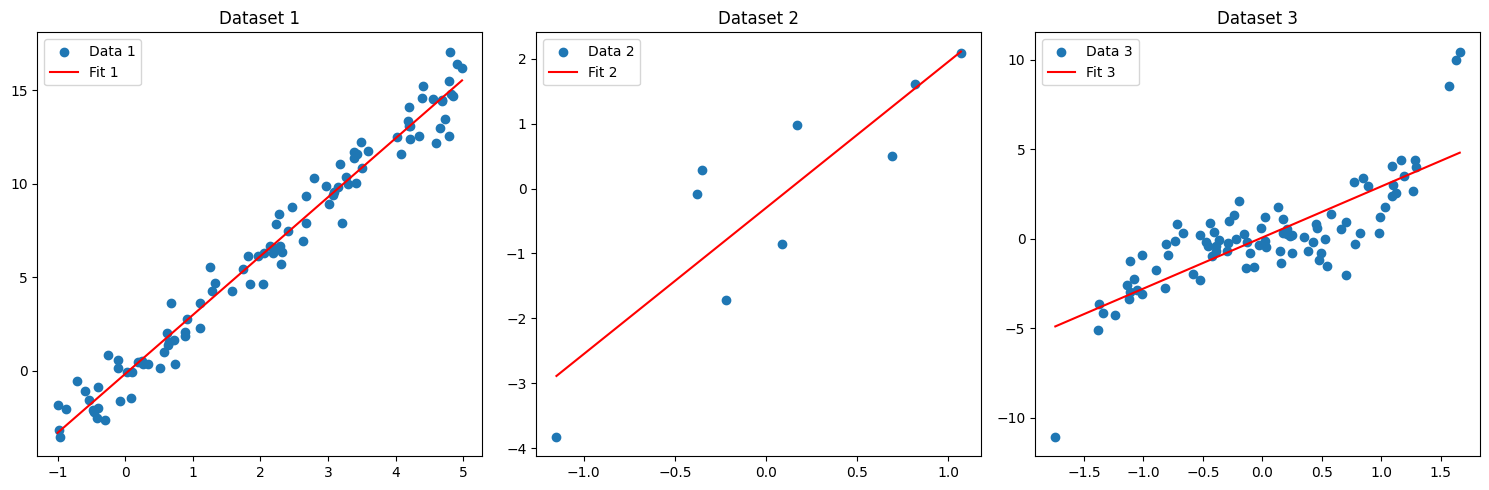

In [53]:
plt.figure(figsize=(15, 5))

# dataset 1
plt.subplot(1, 3, 1)
plt.scatter(df1_clean['x'], df1_clean['y'], label='Data 1')
x1_sorted = np.sort(df1_clean['x'])
plt.plot(x1_sorted, linear_model(x1_sorted, *params1), color='red', label='Fit 1')
plt.legend()
plt.title('Dataset 1')

# dataset 2
plt.subplot(1, 3, 2)
plt.scatter(df2_clean['x'], df2_clean['y'], label='Data 2')
x2_sorted = np.sort(df2_clean['x'])
plt.plot(x2_sorted, linear_model(x2_sorted, *params2), color='red', label='Fit 2')
plt.legend()
plt.title('Dataset 2')

# dataset 3
plt.subplot(1, 3, 3)
plt.scatter(df3_clean['x'], df3_clean['y'], label='Data 3')
x2_sorted = np.sort(df3_clean['x'])
plt.plot(x2_sorted, linear_model(x2_sorted, *params3), color='red', label='Fit 3')
plt.legend()
plt.title('Dataset 3')

plt.tight_layout()
plt.show()


In [54]:
# print coefficient
print(f"Dataset 1 parameters: a={params1[0]}, b={params1[1]}")
print(f"Dataset 2 parameters: a={params2[0]}, b={params2[1]}")
print(f"Dataset 3 parameters: a={params3[0]}, b={params3[1]}")


Dataset 1 parameters: a=3.153109465002611, b=-0.17342557613885784
Dataset 2 parameters: a=2.253223269671264, b=-0.297487241723156
Dataset 3 parameters: a=2.8557597092286446, b=0.06014242002838721


In [55]:
# RSS calculate
rss1 = np.sum((df1_clean['y'] - linear_model(df1['x'], *params1))**2)
rss2 = np.sum((df2_clean['y'] - linear_model(df2['x'], *params2))**2)
rss3 = np.sum((df3_clean['y'] - linear_model(df3['x'], *params3))**2)

print(f"Dataset 1 RSS: {rss1}")
print(f"Dataset 2 RSS: {rss2}")
print(f"Dataset 3 RSS: {rss3}")


Dataset 1 RSS: 93.30677974293336
Dataset 2 RSS: 6.713652460317009
Dataset 3 RSS: 270.9586815448816


## Polynomail model

In [ ]:
def polynomial_model(x, a, b, c):
    return a * x**2 + b * x + c

In [56]:
params1_poly, _ = curve_fit(polynomial_model, np.array(df1_clean['x']), np.array(df1_clean['y']))
params2_poly, _ = curve_fit(polynomial_model, np.array(df2_clean['x']), np.array(df2_clean['y']))
params3_poly, _ = curve_fit(polynomial_model, np.array(df3_clean['x']), np.array(df3_clean['y']))

Dataset 1:


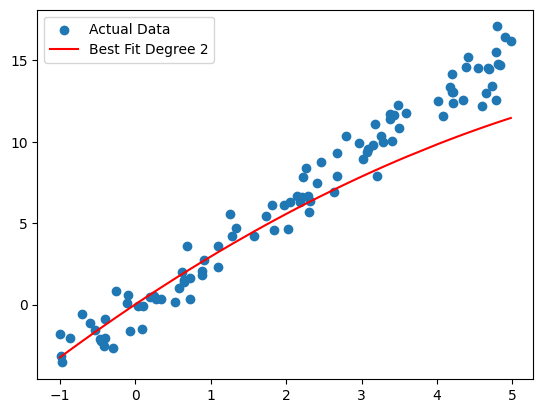

Best degree: 2
R^2: 0.8745288871854383
Coefficients: [ 0.01427658  3.0942885  -0.16003184]
Dataset 2:


/var/folders/2g/3vg04h0d7fvfk1kmr18nsj700000gn/T/ipykernel_24330/3070432127.py:44: RankWarning: Polyfit may be poorly conditioned
  degree, r_squared, coefs_dict = best_poly_fit(x_data, y_data)
/var/folders/2g/3vg04h0d7fvfk1kmr18nsj700000gn/T/ipykernel_24330/3070432127.py:44: RankWarning: Polyfit may be poorly conditioned
  degree, r_squared, coefs_dict = best_poly_fit(x_data, y_data)


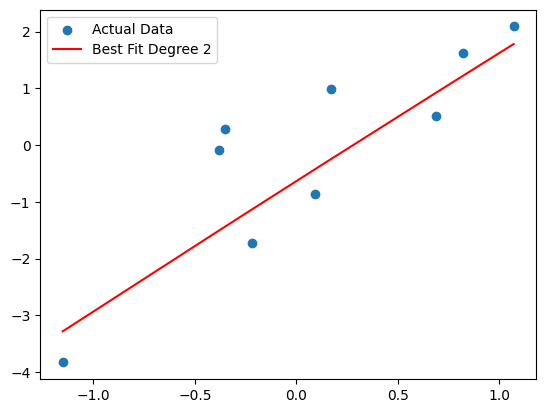

Best degree: 2
R^2: 0.7088560874895183
Coefficients: [-0.63471687  2.27840459 -0.01970399]
Dataset 3:


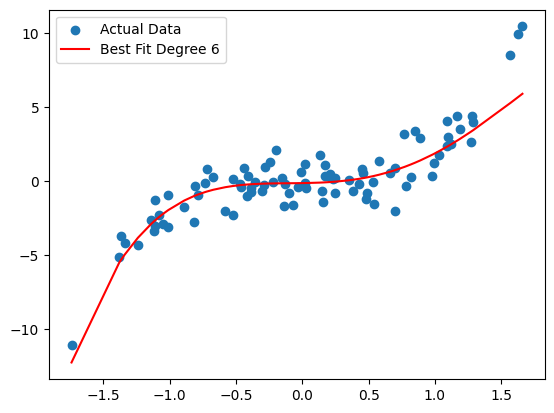

Best degree: 6
R^2: 0.8066433315652551
Coefficients: [-0.12543245  0.13884067  0.58092945  1.75213755 -0.43751452 -0.00804896
 -0.01868277]


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

def best_poly_fit(x_data, y_data, min_degree=2, max_degree=10):
    best_degree = 0
    best_r_squared = -np.inf  
    best_poly_params = None
    polynomial_coefficients = {}

    for degree in range(min_degree, max_degree + 1):
        coefs = np.polyfit(x_data, y_data, degree)
        polynomial_coefficients[degree] = coefs 
        p = Polynomial(coefs)
        y_pred = p(x_data)  

        tss = np.sum((y_data - np.mean(y_data))**2)
        rss = np.sum((y_data - y_pred)**2)
        r_squared = 1 - (rss / tss)

        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_degree = degree
            best_poly_params = coefs

    plt.scatter(x_data, y_data, label='Actual Data')
    sorted_indices = np.argsort(x_data)
    plt.plot(x_data[sorted_indices], Polynomial(best_poly_params)(x_data[sorted_indices]), label=f'Best Fit Degree {best_degree}', color='red')
    plt.legend()
    plt.show()

    return best_degree, best_r_squared, polynomial_coefficients

df_list = [df1_clean, df2_clean, df3_clean]
for i, df in enumerate(df_list, 1):
    print(f"Dataset {i}:")
    x_data = df['x'].values
    y_data = df['y'].values
    degree, r_squared, coefs_dict = best_poly_fit(x_data, y_data)
    print(f"Best degree: {degree}")
    print(f"R^2: {r_squared}")
    print(f"Coefficients: {coefs_dict[degree]}")
